<a href="https://colab.research.google.com/github/Csanggil/pyWeb/blob/main/%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 폰트설정 후 런타음 다시시작
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
# 0. 설치
!pip install --upgrade PublicDataReader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 1. 라이브러리 임포트하기
import PublicDataReader as pdr
print(pdr.__version__)

1.0.5


In [ ]:
# 2. 공공 데이터 포털 OpenAPI 서비스 인증키 입력하기
serviceKey="Fh4TSxo04soUI6YDhN4kth6x9pvuZcJQXAdmOFtY3gIYOQe8P%2BL6kt4Oxx10XTqGJME%2B%2BulqBS6EJUOXlg8WhA%3D%3D"
# 3. 국토교통부 실거래가 정보 조회 OpenAPI 세션 정의하기
# debug: True이면 모든 메시지 출력, False이면 오류 메시지만 출력 (기본값: False)
ts = pdr.Transaction(serviceKey, debug=True)

[INFO] 아파트 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
INFO:root:아파트 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[ERROR] 아파트 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:아파트 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
[ERROR] 오피스텔 매매 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:오피스텔 매매 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
[ERROR] 오피스텔 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:오피스텔 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
[ERROR] 단독다가구 매매 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:단독다가구 매매 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
[ERROR] 단독다가구 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:단독다가구 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
[ERROR] 연립다세대 매매 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:연립다세대 매매 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
[ERROR] 연립다세대 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.
ERROR:root:연립다세대 전월세 조회 서비스 오류 - (99) SERVICE ACCESS DENIED ERROR.


In [ ]:
# 4. 지역코드(시군구코드) 검색하기
sigunguName = "은평구"                                  
code = pdr.code_bdong()
code.loc[(code['시군구명'].str.contains(sigunguName, na=False)) &
         (code['읍면동명'].isna())]

,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
573,11,서울특별시,11380,은평구,1138000000,NaN,NaN,19880423,NaN


In [ ]:
# 5. 지역, 기간 별 데이터 프레임 만들기
prod="아파트"                                           # 아파트
trans="매매"                                            # 매매
sigunguCode="11380"                                     # 시군구코드
startYearMonth="202109"                                 # 시작기간
endYearMonth="202209"                                   # 끝기간

df = ts.collect_data(prod, trans, sigunguCode, startYearMonth, endYearMonth)
df.head()

[INFO] 아파트 매매 202109 조회 시작
INFO:root:아파트 매매 202109 조회 시작
[INFO] 아파트 매매 202110 조회 시작
INFO:root:아파트 매매 202110 조회 시작
[INFO] 아파트 매매 202111 조회 시작
INFO:root:아파트 매매 202111 조회 시작
[INFO] 아파트 매매 202112 조회 시작
INFO:root:아파트 매매 202112 조회 시작
[INFO] 아파트 매매 202201 조회 시작
INFO:root:아파트 매매 202201 조회 시작
[INFO] 아파트 매매 202202 조회 시작
INFO:root:아파트 매매 202202 조회 시작
[INFO] 아파트 매매 202203 조회 시작
INFO:root:아파트 매매 202203 조회 시작
[INFO] 아파트 매매 202204 조회 시작
INFO:root:아파트 매매 202204 조회 시작
[INFO] 아파트 매매 202205 조회 시작
INFO:root:아파트 매매 202205 조회 시작
[INFO] 아파트 매매 202206 조회 시작
INFO:root:아파트 매매 202206 조회 시작
[INFO] 아파트 매매 202207 조회 시작
INFO:root:아파트 매매 202207 조회 시작
[INFO] 아파트 매매 202208 조회 시작
INFO:root:아파트 매매 202208 조회 시작
[INFO] 아파트 매매 202209 조회 시작
INFO:root:아파트 매매 202209 조회 시작


,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,11380,은평터널로,수색동,415-1,대림한숲(DMC이편한세상),2003,3,59.8950,2021,9,...,0415,0001,11380,10100,1,11380-100,,,,
1,11380,은평터널로,수색동,416-1,진흥엣세벨,2003,10,57.5033,2021,9,...,0416,0001,11380,10100,1,11380-173,,,,
2,11380,증산로1길,수색동,413,청구,2000,14,59.9700,2021,9,...,0413,0000,11380,10100,1,11380-102,,,,
3,11380,은평터널로,수색동,415-1,대림한숲(DMC이편한세상),2003,14,114.1800,2021,9,...,0415,0001,11380,10100,1,11380-100,,,,
4,11380,은평터널로,수색동,415-1,대림한숲(DMC이편한세상),2003,14,114.1800,2021,9,...,0415,0001,11380,10100,1,11380-100,,,,


In [ ]:
#6. 파일로 저장
df.to_excel('은평구 아파트 매매현황.xlsx')

In [ ]:
!pip show plotnine
!pip show missingno
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
from plotnine import *
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  


Name: plotnine
Version: 0.8.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /usr/local/lib/python3.8/dist-packages
Requires: statsmodels, pandas, patsy, matplotlib, mizani, scipy, descartes, numpy
Required-by: 
Name: missingno
Version: 0.5.1
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: MIT License
Location: /usr/local/lib/python3.8/dist-packages
Requires: seaborn, numpy, scipy, matplotlib
Required-by: 


In [ ]:
pre_sale = pd.read_excel('/content/은평구 아파트 매매현황.xlsx')
pre_sale.describe

pre_sale.head()
pre_sale.tail()

,Unnamed: 0,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
848,848,11380,통일로,진관동,62,은평스카이뷰자이,2019.0,28,84.3363,2022,...,62,0,11380,11400,1,11380-10938,중개거래,서울 은평구,NaN,NaN
849,849,11380,진관2로,진관동,88,은평뉴타운우물골(두산위브8단지),2009.0,6,84.5100,2022,...,88,0,11380,11400,1,11380-8506,중개거래,서울 은평구,NaN,NaN
850,850,11380,통일로,진관동,62,은평스카이뷰자이,2019.0,15,84.7488,2022,...,62,0,11380,11400,1,11380-10938,중개거래,서울 은평구,NaN,NaN
851,851,11380,연서로48길,진관동,154,은평뉴타운 제각말 푸르지오(5-1단지),2010.0,8,101.8300,2022,...,154,0,11380,11400,1,11380-8668,중개거래,서울 은평구,NaN,NaN
852,852,11380,통일로,진관동,62,은평스카이뷰자이,2019.0,11,84.3363,2022,...,62,0,11380,11400,1,11380-10938,중개거래,서울 은평구,NaN,NaN


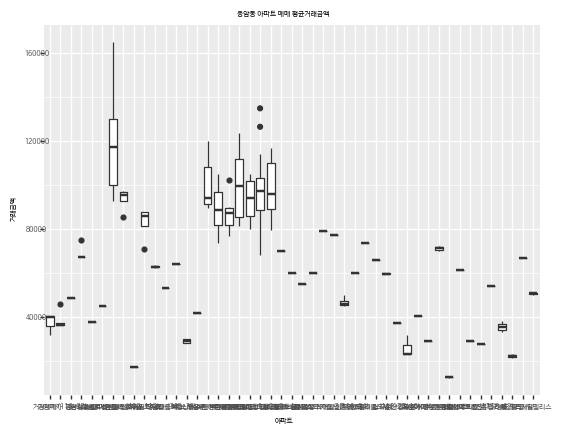

<ggplot: (8788852575729)>

In [ ]:
# 거래매물이 없을시
pre_sale = pre_sale.loc[pre_sale['법정동']=='응암동']
(ggplot(pre_sale)
 + aes(x='아파트', y='거래금액')
 + ggtitle('응암동 아파트 매매 평균거래금액')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
 + theme(text=element_text(hjust=0.5, size=5))
 
)



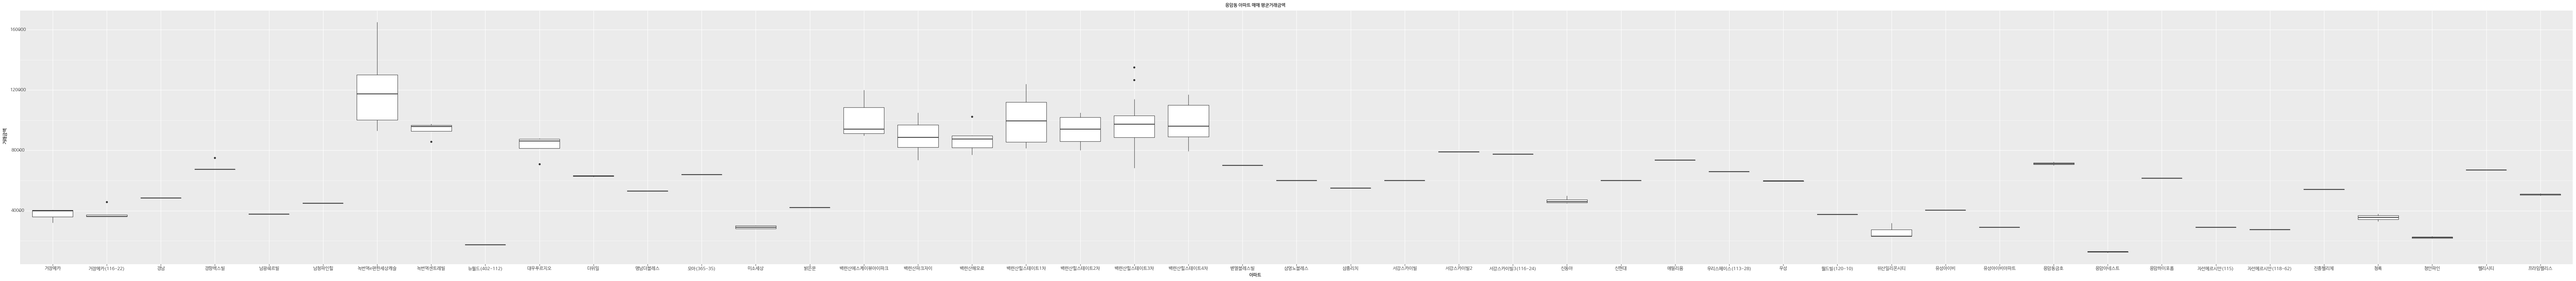

<ggplot: (8788847330579)>

In [ ]:
# 거래매물이 많을시
pre_sale = pre_sale.loc[pre_sale['법정동']=='응암동']
(ggplot(pre_sale)
 + aes(x='아파트', y='거래금액')
 + ggtitle('응암동 아파트 매매 평균거래금액')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),figure_size=(100, 10))
 + theme(text=element_text(hjust=0.5, size=10))


)


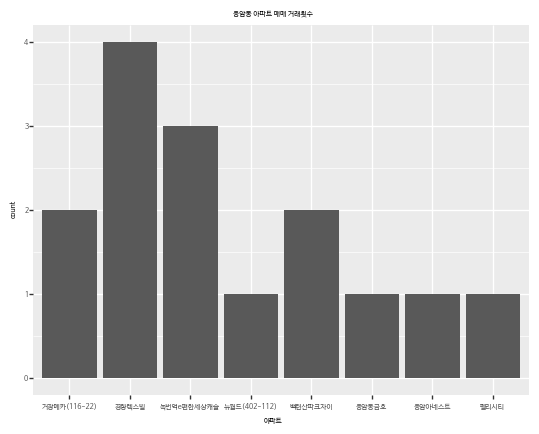

<ggplot: (8756017967860)>

In [ ]:
pre_sale = pre_sale.loc[pre_sale['법정동']=='응암동']
(ggplot(pre_sale,aes(x='아파트'))
 + geom_bar(y="count")
 + ggtitle('응암동 아파트 매매 거래횟수')

 + theme(text=element_text(family='NanumBarunGothic'))
 + theme(text=element_text(hjust=0.5, size=5))
)

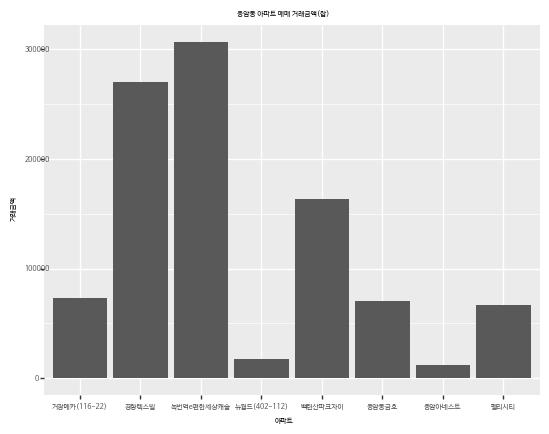

<ggplot: (8756017928244)>

In [ ]:
pre_sale = pre_sale.loc[pre_sale['법정동']=='응암동']
(ggplot(pre_sale)
 + aes(x='아파트', y='거래금액')
 + ggtitle('응암동 아파트 매매 거래금액(합)')
 + geom_col()
 + theme(text=element_text(family='NanumBarunGothic'))
 + theme(text=element_text(hjust=0.5, size=5))
)